In [1]:
import matplotlib.pyplot as plt
import numpy as np
from sequential import Linear, MSELoss, Sequential, ReLU, Tanh
import pandas as pd

df = pd.read_csv('./data/housing.csv')
df = df.dropna()
df['ocean_proximity'] = df['ocean_proximity'].map({'NEAR BAY': 1, '<1H OCEAN': 2, 'INLAND': 3, 'NEAR OCEAN': 4, 'ISLAND': 5})

In [2]:
df.columns

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'median_house_value', 'ocean_proximity'],
      dtype='object')

In [3]:
from sklearn.model_selection import train_test_split

X = df.drop('median_house_value', axis=1)
y = df['median_house_value']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=True)


In [4]:
X_train.shape
X_test.shape

(4087, 9)

In [5]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)

prediction = lin_reg.predict(X_test)

mse = mean_squared_error(y_test, prediction)

print(f'MSE: {mse}')
print(f'RMSE: {mse ** 0.5}')

MSE: 4986435256.443944
RMSE: 70614.69575409884


In [ ]:
from sequential import LinearRegression

lin_reg2 = LinearRegression()

lin_reg2.fit(X_train, y_train)
prediction2 = lin_reg2.predict(y_train)

mse2 = mean_squared_error(y_test, prediction2)

print(f'MSE: {mse2}')
print(f'RMSE: {mse2 ** 0.5}')

In [6]:
X_train.shape

(16346, 9)

In [7]:
from sequential import Linear, MSELoss, Sequential, ReLU, Tanh

model = Sequential([Linear(9, 128, zero_init=True), ReLU(), Linear(128, 64, zero_init=True), ReLU(),  Linear(64, 64, zero_init=True), ReLU(), Linear(64, 1, zero_init=True)], MSELoss())

X_train_batches = np.split(X_train[:16200], 200)
y_train_batches = np.split(np.array(y_train[:16200]), 200)
num_batches = len(X_train_batches)
losses = []
losses_test = []

for i in range(300):
    for j in range(50):
        n = np.random.randint(num_batches)
        curr_batch = X_train_batches[n].T
        y_pred = model.forward(curr_batch)
        loss = model.loss.forward(y_train_batches[n], y_pred)
        delta = model.loss.backward()
        model.backward(delta)
        model.sgd_step(0.01)
    
    if (i % 10 == 0):
        print(f'EPOCH: {i+1}, RMSE loss: {loss ** 0.5}')
        prediction = model.forward(X_test.T)
        loss_test = mean_squared_error(y_test, prediction.reshape(-1,))
        losses_test.append(loss_test)
        losses.append(loss[0])

EPOCH: 1, RMSE loss: [119844.56343885]


c:\Users\tejas\ML_Library\env\Lib\site-packages\numpy\core\fromnumeric.py:59: FutureWarning: 'DataFrame.swapaxes' is deprecated and will be removed in a future version. Please use 'DataFrame.transpose' instead.
  return bound(*args, **kwds)


EPOCH: 11, RMSE loss: [109571.37298656]
EPOCH: 21, RMSE loss: [116068.47968673]
EPOCH: 31, RMSE loss: [122159.05274681]
EPOCH: 41, RMSE loss: [109614.48344325]
EPOCH: 51, RMSE loss: [118322.10922255]
EPOCH: 61, RMSE loss: [93902.80582749]
EPOCH: 71, RMSE loss: [104526.74189787]
EPOCH: 81, RMSE loss: [148882.07398514]
EPOCH: 91, RMSE loss: [108088.87895162]
EPOCH: 101, RMSE loss: [118110.15877497]
EPOCH: 111, RMSE loss: [128245.53680636]
EPOCH: 121, RMSE loss: [116713.46886818]
EPOCH: 131, RMSE loss: [120746.17195257]
EPOCH: 141, RMSE loss: [117707.78818098]
EPOCH: 151, RMSE loss: [113464.44974459]
EPOCH: 161, RMSE loss: [120881.97102896]
EPOCH: 171, RMSE loss: [115451.86775568]
EPOCH: 181, RMSE loss: [110132.65842954]
EPOCH: 191, RMSE loss: [114237.19964259]
EPOCH: 201, RMSE loss: [126864.21735822]
EPOCH: 211, RMSE loss: [135035.75887841]
EPOCH: 221, RMSE loss: [133012.057799]
EPOCH: 231, RMSE loss: [111283.86582689]
EPOCH: 241, RMSE loss: [115144.51795645]
EPOCH: 251, RMSE loss: [1215

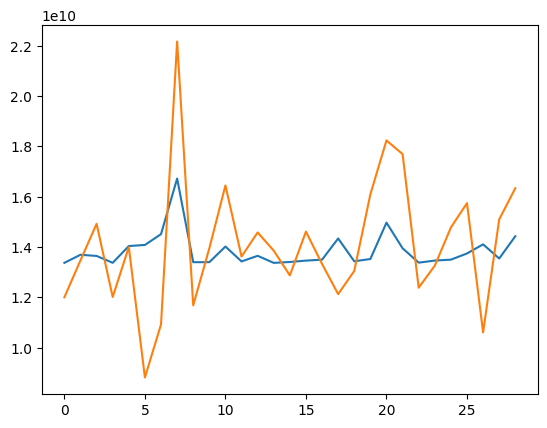

In [8]:
plt.plot(losses_test[1:])
plt.plot(losses[1:])
plt.show()

In [9]:
loss ** 0.5

array([128143.2066407])